In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import OLS

# <center> Linear Regression

In [2]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Load dataset from seaborn, you can also select other data set with sns.get_dataset_names()

In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Describe the data set to see mean, standard deviaton, q1, median, q3, max value abd min value of the data

In [4]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


to see the correlation value of the feature
here is the value have meaning :
* x < 0.3    = No correlation
* 0.3-0.5 = Low Correlation
* 0.5-0.8 = Medium Correlation
* x > 0.8    = Strong Correlation
* the + value means have positive relationship (linear line up)
* the - value means have negative relationship (linear line down)

Simple Linear Regression
* X = total_bill
* Y = tip


x is dependent and Y is independent variable

we want to analyze the how total bill affected tips

In [9]:
df[['tip','total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


In [10]:
df[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


corr 0.675 medium, + value means directly proportional

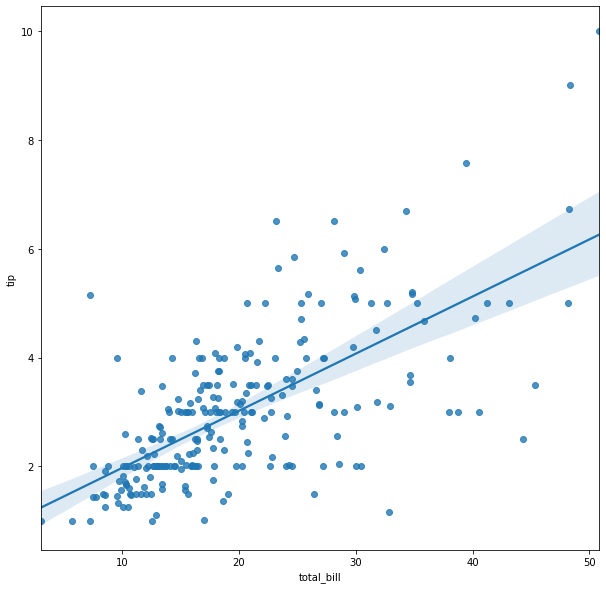

In [11]:
plt.figure(figsize = (10,10))
sns.regplot(x='total_bill',y='tip', data = df)

In [8]:
sm_lm = OLS(df['tip'],sm.add_constant(df['total_bill']))
result = sm_lm.fit()

sm_lm = OLS( y = df['tip'], x = sm.add_constant(df['total_bill']))

In [9]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           6.69e-34
Time:                        01:36:49   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

from the result we get the model equation : Y = 0.9203 (const) + 0.1050 (Total_bill) X

* F-Test (6.69e-34) : have value <0.05 (α), its means have enough prove that total bill affect number of tip given to the waiter
* Partial test/T-test :
>* B0 (const)     = 0.9203 --> it doesn't matter, because there is no people who eat free on the restaurant (x=0)
>* B1 (Total_bil) = P-val (P>|t|) < 0.05, meaning that the larger the total bill the greater the number of tips given

* Conclusion :
>* When the total bill value increases by $ 1, the tip value given will increase by 0.105 (* this interpretation is better done within the data range we have where the tip range is in the 3-50 dollar range)

R-Squared (Coefficient Determination) : this model can explain 45,7% from tip variance.

In [14]:
print('*'*40)

****************************************


So thats all about the simpe linear regression, in the future there is the other type of linear regression, feel free to comment, im still learning and very happy if you want to discuss with me